# EDA of the Airbnb listings in Málaga

## Introduction
This analysis is based on previous studies performed at the Dasta Analysis Bootcamp of CodeOp.<br>
The objective of this EDA is to identify which features (reviews, bed, neighbourhood, instant bookable, etc) can most affect the price asked.<br>
This noteboomp is composed of two parts:
- Dataframe cleaning
- Graphs creation


### Part 1 - Cleaning

In [5]:
import pandas as pd
import seaborn as sns


In [6]:
listings = pd.read_csv('listings_EDA.csv')

In [7]:
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,96033,https://www.airbnb.com/rooms/96033,20231231043937,2023-12-31,city scrape,Rental unit in Málaga · ★4.62 · 2 bedrooms · 2...,NaN,"A 200 metros de las playas de El Palo, antiguo...",https://a0.muscache.com/pictures/32780788/e487...,510467,...,4.92,4.40,4.60,VFT/MA/22043,f,1,1,0,0,1.66
1,166473,https://www.airbnb.com/rooms/166473,20231231043937,2023-12-31,city scrape,Rental unit in Málaga · ★4.73 · 1 bedroom · 4 ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,793360,...,4.91,4.81,4.70,NaN,f,4,0,4,0,0.63
2,212845,https://www.airbnb.com/rooms/212845,20231231043937,2023-12-31,city scrape,Rental unit in Málaga · ★4.81 · 1 bedroom · 2 ...,NaN,NaN,https://a0.muscache.com/pictures/d4a19330-03c4...,617998,...,4.88,4.57,4.76,VFT/MA/09354,f,2,0,1,1,0.30
3,330760,https://www.airbnb.com/rooms/330760,20231231043937,2023-12-31,city scrape,Townhouse in Málaga · ★4.50 · 1 bedroom · 1 be...,NaN,Málaga Lodge is situated next to the famous Sa...,https://a0.muscache.com/pictures/85419390/38a9...,1687526,...,4.58,4.48,4.45,VFT/MA/12240,t,6,4,2,0,0.38
4,340024,https://www.airbnb.com/rooms/340024,20231231043937,2023-12-31,city scrape,Rental unit in Málaga · ★4.83 · 1 bedroom · 1 ...,NaN,It is a central area and has all kinds of serv...,https://a0.muscache.com/pictures/e5a7e85a-ad98...,1725690,...,4.83,4.72,4.79,VFT/MA/02334,f,1,1,0,0,1.86


### Cleaning Steps:

1. Do a for loop to identify how many Nans there are in each column.

In [8]:

for column in listings.columns:
    nans_columns = listings[column].isna().sum()
    print (column, nans_columns) 

id 0
listing_url 0
scrape_id 0
last_scraped 0
source 0
name 0
description 7783
neighborhood_overview 4020
picture_url 0
host_id 0
host_url 0
host_name 0
host_since 0
host_location 1782
host_about 3287
host_response_time 625
host_response_rate 625
host_acceptance_rate 330
host_is_superhost 35
host_thumbnail_url 0
host_picture_url 0
host_neighbourhood 7052
host_listings_count 0
host_total_listings_count 0
host_verifications 0
host_has_profile_pic 0
host_identity_verified 0
neighbourhood 4020
neighbourhood_cleansed 0
neighbourhood_group_cleansed 7783
latitude 0
longitude 0
property_type 0
room_type 0
accommodates 0
bathrooms 7783
bathrooms_text 0
bedrooms 7783
beds 86
amenities 0
price 64
minimum_nights 0
maximum_nights 0
minimum_minimum_nights 0
maximum_minimum_nights 0
minimum_maximum_nights 0
maximum_maximum_nights 0
minimum_nights_avg_ntm 0
maximum_nights_avg_ntm 0
calendar_updated 7783
has_availability 64
availability_30 0
availability_60 0
availability_90 0
availability_365 0
calend

2. Verify the shape of the original data.

In [9]:
listings.shape

(7783, 75)

3. Create a copy so that I could leave the original data untouched.

In [10]:
listings_clean = listings.copy()

With the for loop performed I identified that the following columns had only NANs:<br>

- description
- neighbourhood_group_cleansed
-  bathrooms
-  bedrooms
-  calendar_updated


4. Use dropna all to delete themthe columns that have all NANs.

In [11]:
#drop the columns that are all Nans
listings_clean.dropna(axis=1, how='all', inplace = True)


5. Check the shape after dropping the columns.

In [12]:
listings_clean.shape[1]

70

6. Check the data info.

In [13]:
listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7783 entries, 0 to 7782
Data columns (total 70 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7783 non-null   int64  
 1   listing_url                                   7783 non-null   object 
 2   scrape_id                                     7783 non-null   int64  
 3   last_scraped                                  7783 non-null   object 
 4   source                                        7783 non-null   object 
 5   name                                          7783 non-null   object 
 6   neighborhood_overview                         3763 non-null   object 
 7   picture_url                                   7783 non-null   object 
 8   host_id                                       7783 non-null   int64  
 9   host_url                                      7783 non-null   o

As there are some columns that have most of the info as NANs, it is not possible to perform the dropna to delete the empty rows straight away.

7. Drop the collumns that won't be used in this analysis.

In [14]:
#dropping the the columns that I wont be using as well as the columns with large amount of nans so that it doesn't affect the drop rows with Nans 
listings_clean.drop(
    [
    'listing_url', 'scrape_id','last_scraped',
    'source', 'name', 'neighborhood_overview',
    'host_neighbourhood','picture_url',
    'host_id', 'host_url','host_name',
    'host_location','host_about', 'host_thumbnail_url', 'neighbourhood',
    'host_picture_url','host_neighbourhood', 'calendar_last_scraped', 'license'

    ], 
    axis=1, inplace = True
    )

8. Check the shape.

In [15]:
listings_clean.shape

(7783, 52)

9. Check the other columns with NANs.

In [16]:
listings_clean.isna().sum()

id                                                0
host_since                                        0
host_response_time                              625
host_response_rate                              625
host_acceptance_rate                            330
host_is_superhost                                35
host_listings_count                               0
host_total_listings_count                         0
host_verifications                                0
host_has_profile_pic                              0
host_identity_verified                            0
neighbourhood_cleansed                            0
latitude                                          0
longitude                                         0
property_type                                     0
room_type                                         0
accommodates                                      0
bathrooms_text                                    0
beds                                             86
amenities   

10. Check the type of the columns:
- host_response_time
- host_response_rate
- host_acceptance_rate 


In [17]:
listings_clean[['host_response_time', 'host_response_rate', 'host_acceptance_rate']].dtypes

host_response_time      object
host_response_rate      object
host_acceptance_rate    object
dtype: object

In [18]:
listings_clean['host_response_time']

0           within an hour
1       within a few hours
2       within a few hours
3           within an hour
4           within an hour
               ...        
7778                   NaN
7779        within an hour
7780        within an hour
7781          within a day
7782                   NaN
Name: host_response_time, Length: 7783, dtype: object

11. Check the values of acceptance and response:

In [19]:
listings_clean[['host_acceptance_rate', 'host_response_rate']]	

,host_acceptance_rate,host_response_rate
0,100%,100%
1,78%,100%
2,94%,100%
3,99%,100%
4,100%,100%
...,...,...
7778,85%,NaN
7779,100%,100%
7780,100%,100%
7781,100%,100%


These two columns figure as an object, but they are percentage, so we need first change into float to deal with the NANs.

In [20]:
#changing the host_acceptance_rate and host_response_rate from object to percentage
host_rate = ['host_acceptance_rate', 'host_response_rate']

for col in host_rate:
    listings_clean[col] = listings_clean[col].str.replace('%', '').astype(float)

In [21]:
listings_clean[host_rate].dtypes

host_acceptance_rate    float64
host_response_rate      float64
dtype: object

12. Replace the NANs by the mean using fillna.

In [22]:
#replacing the nans by the mean
listings_clean[host_rate] = listings_clean[host_rate].fillna(listings_clean[host_rate].mean())

In [23]:
listings_clean[host_rate].isna().sum()

host_acceptance_rate    0
host_response_rate      0
dtype: int64

The columns first and last review are showing as object, but they are Datetime, therefor it is needed to change to Datetime before work with the NANs

In [24]:
from datetime import datetime

In [25]:
#changing first and last reviews to datetime
first_last = ['first_review', 'last_review']

for col in first_last:
    listings_clean[col] = pd.to_datetime(listings_clean[col], format="%Y-%m-%d")

In [26]:
listings_clean[['first_review', 'last_review']].dtypes

first_review    datetime64[ns]
last_review     datetime64[ns]
dtype: object

13. Replace the NaT values in the datetime columns by the value from the previous row using ffill.

In [27]:

listings_clean[first_last] = listings_clean[first_last].ffill()

In [28]:
listings_clean[first_last].dtypes

first_review    datetime64[ns]
last_review     datetime64[ns]
dtype: object

Now we need to deal with the reviews NANs

In [29]:
listings_clean.isna().sum()

id                                                0
host_since                                        0
host_response_time                              625
host_response_rate                                0
host_acceptance_rate                              0
host_is_superhost                                35
host_listings_count                               0
host_total_listings_count                         0
host_verifications                                0
host_has_profile_pic                              0
host_identity_verified                            0
neighbourhood_cleansed                            0
latitude                                          0
longitude                                         0
property_type                                     0
room_type                                         0
accommodates                                      0
bathrooms_text                                    0
beds                                             86
amenities   

14. Replace the NANs by its mean in all review columns.

In [30]:
review_columns = [
    'review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
    'review_scores_checkin','review_scores_communication',
    'review_scores_location', 'review_scores_value', 
    'reviews_per_month'
                ]

In [31]:
#replace the nans by the mean in the review columns
listings_clean[review_columns] = listings_clean[review_columns].fillna(listings_clean[review_columns].mean())  


In [32]:
listings_clean.isna().sum()

id                                                0
host_since                                        0
host_response_time                              625
host_response_rate                                0
host_acceptance_rate                              0
host_is_superhost                                35
host_listings_count                               0
host_total_listings_count                         0
host_verifications                                0
host_has_profile_pic                              0
host_identity_verified                            0
neighbourhood_cleansed                            0
latitude                                          0
longitude                                         0
property_type                                     0
room_type                                         0
accommodates                                      0
bathrooms_text                                    0
beds                                             86
amenities   

15. Now the host_response _time is the only column that has more than 900 NANs, in this case I'll replace it by None.

In [33]:
listings_clean['host_response_time'].value_counts()

host_response_time
within an hour        6258
within a few hours     459
within a day           291
a few days or more     150
Name: count, dtype: int64

In [34]:
#replace NaNs in the host_response_time by None
listings_clean['host_response_time'].fillna('None', inplace=True)

In [35]:
listings_clean['host_response_time'].value_counts()

host_response_time
within an hour        6258
None                   625
within a few hours     459
within a day           291
a few days or more     150
Name: count, dtype: int64

16. After these cleaning it is possible to use dropna to delete de rows that have just a few NANs

In [36]:
listings_clean.isna().sum()

id                                               0
host_since                                       0
host_response_time                               0
host_response_rate                               0
host_acceptance_rate                             0
host_is_superhost                               35
host_listings_count                              0
host_total_listings_count                        0
host_verifications                               0
host_has_profile_pic                             0
host_identity_verified                           0
neighbourhood_cleansed                           0
latitude                                         0
longitude                                        0
property_type                                    0
room_type                                        0
accommodates                                     0
bathrooms_text                                   0
beds                                            86
amenities                      

In [37]:
listings_clean.shape

(7783, 52)

In [38]:
listings_clean.dropna(inplace=True)

In [39]:
listings_clean.shape

(7598, 52)

17. The price column is also in the format of object, in order to work with it we need to delete the $ and the comma to change it to float.

In [40]:
listings_clean['price'].dtypes


dtype('O')

In [41]:
listings_clean['price'] = listings_clean['price'].str.replace('$', '').str.replace(',','').astype(float)

In [42]:
listings_clean['price'].dtypes

dtype('float64')

Final result of the file

In [43]:
listings_clean

,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,96033,2011-04-15,within an hour,100.00000,100.0,f,1,1,"['email', 'phone', 'work_email']",t,...,4.870000,4.920000,4.400000,4.600000,f,1,1,0,0,1.660000
1,166473,2011-07-08,within a few hours,100.00000,78.0,t,4,4,"['email', 'phone']",t,...,4.820000,4.910000,4.810000,4.700000,f,4,0,4,0,0.630000
2,212845,2011-05-23,within a few hours,100.00000,94.0,f,3,3,"['email', 'phone']",t,...,4.930000,4.880000,4.570000,4.760000,f,2,0,1,1,0.300000
3,330760,2012-02-02,within an hour,100.00000,99.0,f,7,9,"['email', 'phone']",t,...,4.690000,4.580000,4.480000,4.450000,t,6,4,2,0,0.380000
4,340024,2012-02-09,within an hour,100.00000,100.0,t,1,1,"['email', 'phone']",t,...,4.870000,4.830000,4.720000,4.790000,f,1,1,0,0,1.860000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7777,1056480591998749035,2019-02-26,within an hour,100.00000,97.0,f,52,53,"['email', 'phone', 'work_email']",t,...,4.742419,4.765037,4.704725,4.560159,t,20,20,0,0,1.469093
7779,1056634780623178557,2012-08-26,within an hour,100.00000,100.0,f,90,191,"['email', 'phone', 'work_email']",t,...,4.742419,4.765037,4.704725,4.560159,t,67,67,0,0,1.469093
7780,1056663927854621164,2012-08-26,within an hour,100.00000,100.0,f,90,191,"['email', 'phone', 'work_email']",t,...,4.742419,4.765037,4.704725,4.560159,t,67,67,0,0,1.469093
7781,1056694008736627484,2022-04-29,within a day,100.00000,100.0,f,2,2,"['email', 'phone']",t,...,4.742419,4.765037,4.704725,4.560159,f,2,2,0,0,1.469093


18. Reset the index.

In [44]:
listings_clean.reset_index(drop=True, inplace=True)

### Part 2 - Graphs

In [45]:
import seaborn as sns
from matplotlib import pyplot as plt

In [46]:
print(listings_clean['price'].value_counts())


price
100.0      127
80.0       105
90.0       101
65.0        94
94.0        91
          ... 
1250.0       1
442.0        1
78120.0      1
581.0        1
855.0        1
Name: count, Length: 505, dtype: int64


In [47]:
listings_clean = listings_clean[listings_clean['price'] <= 600]

<Axes: xlabel='price', ylabel='Count'>

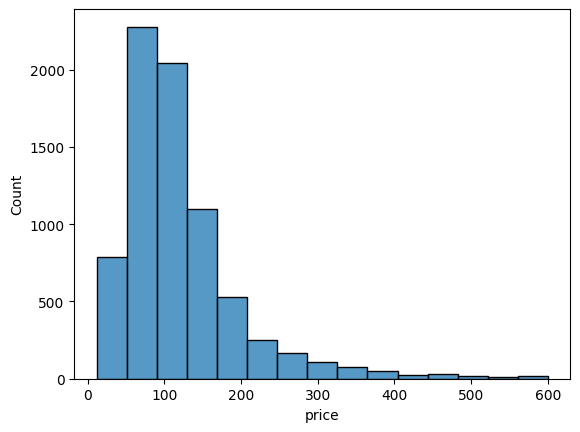

In [48]:
sns.histplot(
    data = listings_clean,
    x = 'price', binwidth=40
)

In this histplot we can see that the price per night is between 50 and 150 dollars in over 2000 instances.<br>
While the price per night is 200 dollars in 500 instances.

<Axes: ylabel='price'>

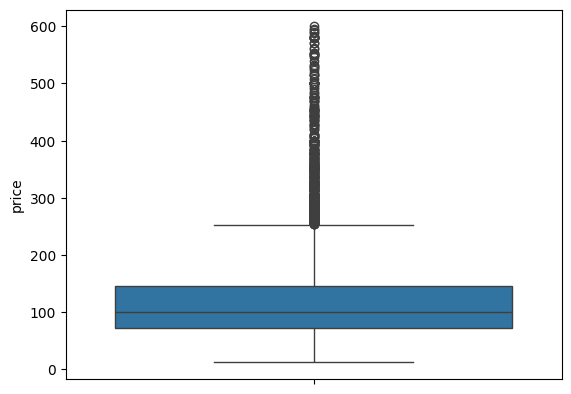

In [49]:
sns.boxplot(
    data = listings_clean,
    y = 'price'
)

- In this boxplot we can see that the median is 100.<br>
- 25% of the instances are lower than 100.<br>
- 75% of the instances are between 100 and 200.<br>
- Above 300 are outliers.

Removing the outliers.

In [50]:
q3 = listings_clean['price'].quantile(0.75)
q1 = listings_clean['price'].quantile(0.25)
iqr = q3 - q1
upper_bound = q3 + (1.5 * iqr)
lower_bound = q1 + (1.5 * iqr)
listings_outliers = listings_clean[
    (listings_clean['price'] < upper_bound) &
    (listings_clean['price'] > lower_bound)
]


<Axes: ylabel='price'>

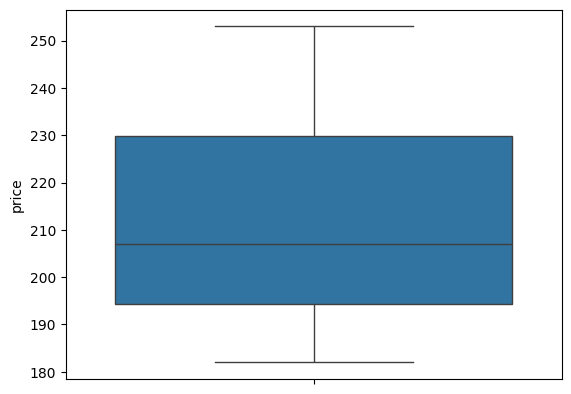

In [51]:
sns.boxplot(
    data = listings_outliers,
    y = 'price'
)

Removing the outliers we have:<br>
- 25% of the instances are between 190 and 205 dollars.
- 75% of the instances are between 210 and 230 dollars.
- The median is 205 dollars.

Text(0, 0.5, 'Number of Instances')

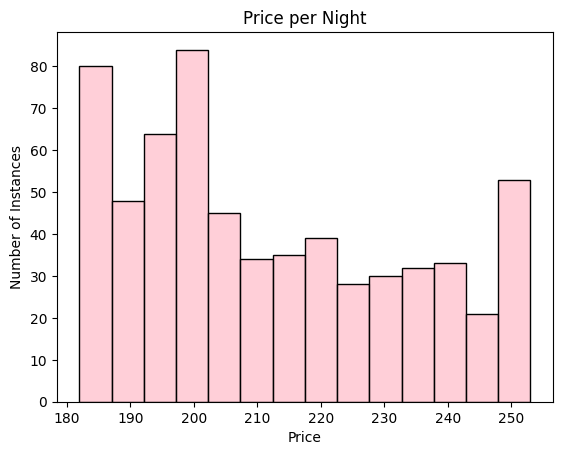

In [52]:

sns.histplot(
    data=listings_outliers, x="price", binwidth=5, color='pink')
plt.title("Price per Night")
plt.xlabel("Price")
plt.ylabel("Number of Instances")

In this histplot we can see that the price per night that is most common in the instances is 200 dollars with over 80 instances.<br>
 

In [53]:
listings_clean.columns

Index(['id', 'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'beds', 'amenities',
       'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_commun

Text(0, 0.5, 'Number of Instances')

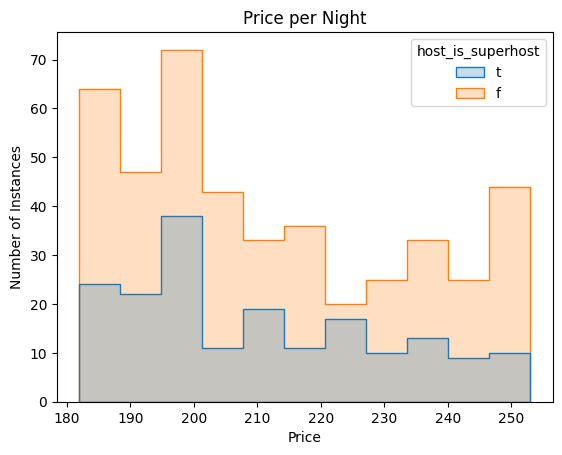

In [54]:
sns.histplot(
    data=listings_outliers, x="price",  hue='host_is_superhost',element ='step')
plt.title("Price per Night")
plt.xlabel("Price")
plt.ylabel("Number of Instances")

In this histplot we come to the conclusion that being a superhost does not affect the price.<br>
- Only around 40 instances with price per nigh of 200 dollars are a superhost,<br>
- Also, less than 10 instances with the price per night of 250 are a superhost.

To create the next graph it I'll check the amount of beds.

In [55]:
listings_clean['beds'].value_counts()

beds
2.0     2306
1.0     2193
3.0     1421
4.0      838
5.0      355
6.0      157
7.0       85
8.0       45
10.0      23
9.0       19
12.0      12
13.0       8
11.0       8
14.0       4
16.0       4
15.0       3
18.0       3
20.0       2
25.0       1
17.0       1
Name: count, dtype: int64

As we have just a few instances with more than 6 beds I created a variable with less than 6 beds.

In [73]:
listings_outliers = listings_outliers[listings_outliers['beds']<=6]

 Then I'll create a boxplot to compare the prices, neighbourhood and number of beds.

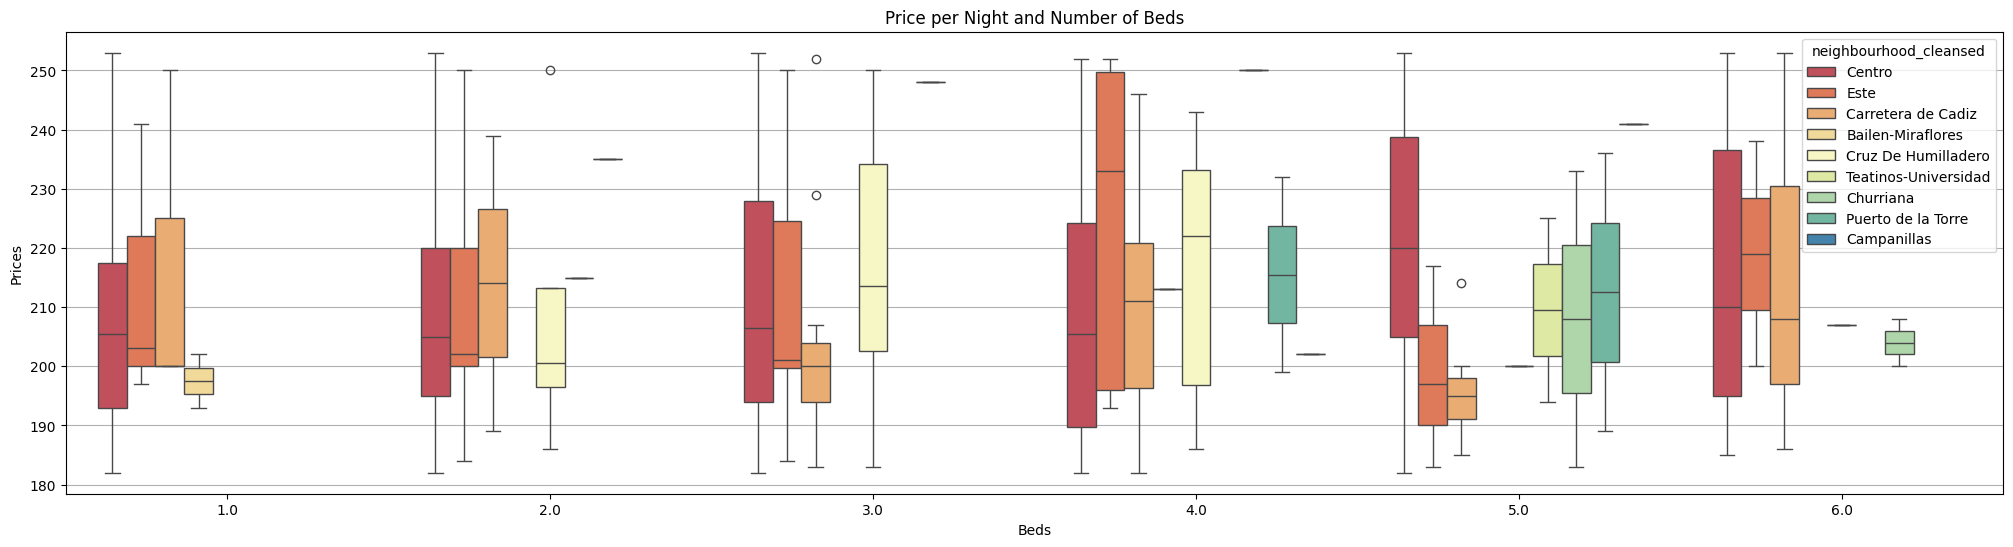

In [156]:
plt.figure(figsize = (25,6))
sns.boxplot(data=listings_outliers, y ='price', x='beds', hue = 'neighbourhood_cleansed', palette='Spectral')
plt.title("Price per Night and Number of Beds")
plt.xlabel('Beds')
plt.ylabel('Prices')
plt.grid(axis = 'y')


Findings:<br>
- Neighbourhood 'Centro': The average price in houses with 1 to 4 beds is 205, in houses with 5 beds it increases to 220.<br> Therefore, in this neighbourhood there is no correlation between price and number of beds.
- Houses in the neighbourhood 'Este': The average price in houses with 1 to 3 beds is around 202, although it has a peak to 233 in houses with 4 beds, and it has a significant decrease to 197 in houses with 5 bedrooms.
- Houses in the neighbourhood 'Carretera de Cadiz': The prices ranges from 195 to 215 and are not correlated to the number of beds.
- Houses in the neighbourhood 'Cruz de Humiladero': In this neighbourhood the prices increases according to the number of beds, ranging from 200 to 225.




In [172]:
listings_outliers[['beds', 'neighbourhood_cleansed']].value_counts()


beds  neighbourhood_cleansed
3.0   Centro                    130
2.0   Centro                    107
4.0   Centro                     76
1.0   Centro                     64
5.0   Centro                     42
6.0   Centro                     27
3.0   Este                       24
4.0   Este                       14
      Carretera de Cadiz         12
3.0   Carretera de Cadiz         11
      Cruz De Humilladero        10
2.0   Este                        9
4.0   Cruz De Humilladero         8
5.0   Carretera de Cadiz          7
      Este                        5
2.0   Cruz De Humilladero         4
6.0   Carretera de Cadiz          3
1.0   Carretera de Cadiz          3
      Este                        3
5.0   Teatinos-Universidad        2
6.0   Churriana                   2
5.0   Puerto de la Torre          2
      Churriana                   2
1.0   Bailen-Miraflores           2
4.0   Puerto de la Torre          2
      Campanillas                 2
2.0   Carretera de Cadiz          2

In [168]:
listings_outliers.groupby(['beds', 'neighbourhood_cleansed'])['price'].median()

beds  neighbourhood_cleansed
1.0   Bailen-Miraflores         197.5
      Carretera de Cadiz        200.0
      Centro                    205.5
      Este                      203.0
2.0   Carretera de Cadiz        214.0
      Centro                    205.0
      Churriana                 235.0
      Cruz De Humilladero       200.5
      Este                      202.0
      Teatinos-Universidad      215.0
3.0   Carretera de Cadiz        200.0
      Centro                    206.5
      Churriana                 248.0
      Cruz De Humilladero       213.5
      Este                      201.0
4.0   Bailen-Miraflores         213.0
      Campanillas               202.0
      Carretera de Cadiz        211.0
      Centro                    205.5
      Churriana                 250.0
      Cruz De Humilladero       222.0
      Este                      233.0
      Puerto de la Torre        215.5
5.0   Campanillas               241.0
      Carretera de Cadiz        195.0
      Centro         

In [200]:
listings_clean[listings_clean['review_scores_rating']>=3]

,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,96033,2011-04-15,within an hour,100.00000,100.0,f,1,1,"['email', 'phone', 'work_email']",t,...,4.870000,4.920000,4.400000,4.600000,f,1,1,0,0,1.660000
1,166473,2011-07-08,within a few hours,100.00000,78.0,t,4,4,"['email', 'phone']",t,...,4.820000,4.910000,4.810000,4.700000,f,4,0,4,0,0.630000
2,212845,2011-05-23,within a few hours,100.00000,94.0,f,3,3,"['email', 'phone']",t,...,4.930000,4.880000,4.570000,4.760000,f,2,0,1,1,0.300000
3,330760,2012-02-02,within an hour,100.00000,99.0,f,7,9,"['email', 'phone']",t,...,4.690000,4.580000,4.480000,4.450000,t,6,4,2,0,0.380000
4,340024,2012-02-09,within an hour,100.00000,100.0,t,1,1,"['email', 'phone']",t,...,4.870000,4.830000,4.720000,4.790000,f,1,1,0,0,1.860000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7593,1056480591998749035,2019-02-26,within an hour,100.00000,97.0,f,52,53,"['email', 'phone', 'work_email']",t,...,4.742419,4.765037,4.704725,4.560159,t,20,20,0,0,1.469093
7594,1056634780623178557,2012-08-26,within an hour,100.00000,100.0,f,90,191,"['email', 'phone', 'work_email']",t,...,4.742419,4.765037,4.704725,4.560159,t,67,67,0,0,1.469093
7595,1056663927854621164,2012-08-26,within an hour,100.00000,100.0,f,90,191,"['email', 'phone', 'work_email']",t,...,4.742419,4.765037,4.704725,4.560159,t,67,67,0,0,1.469093
7596,1056694008736627484,2022-04-29,within a day,100.00000,100.0,f,2,2,"['email', 'phone']",t,...,4.742419,4.765037,4.704725,4.560159,f,2,2,0,0,1.469093


Text(0, 0.5, 'Price ($)')

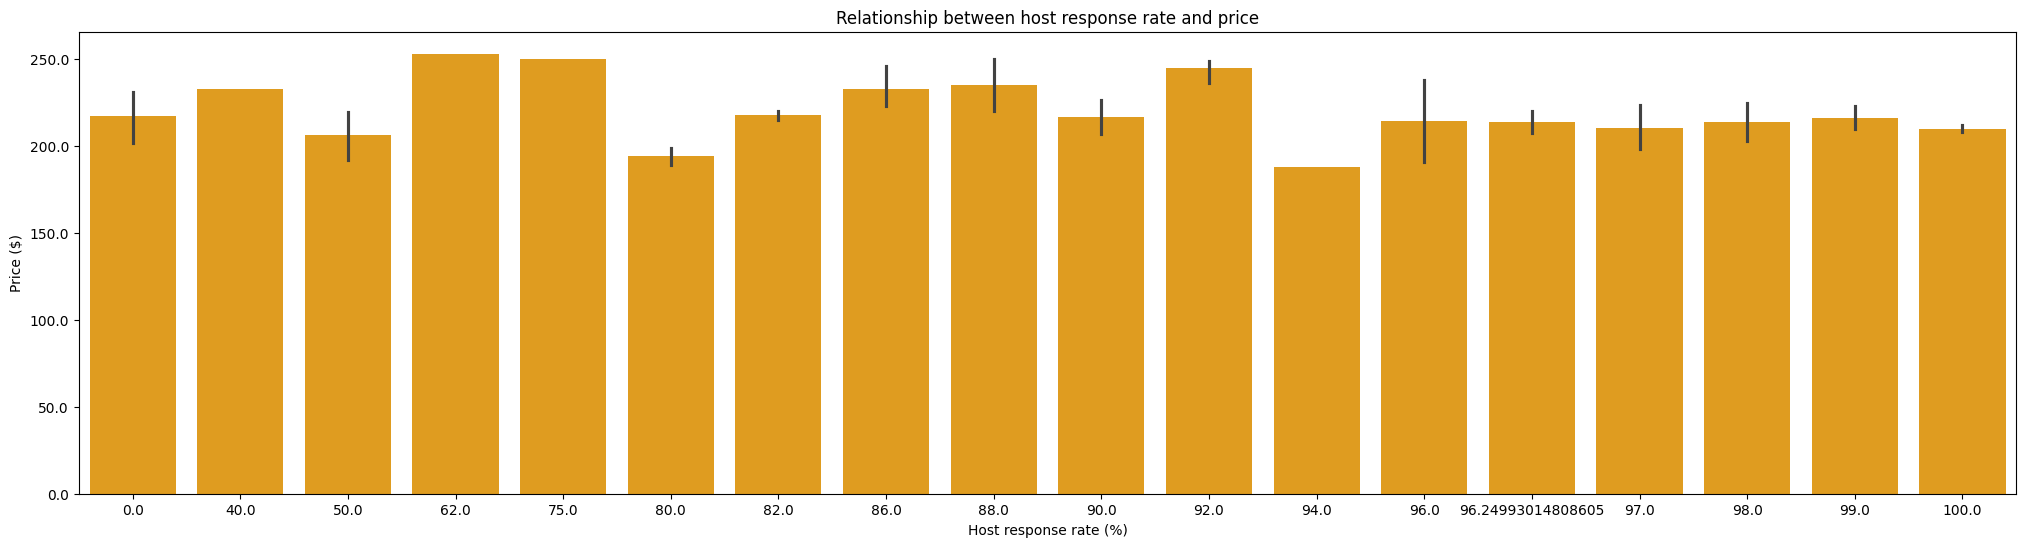

In [238]:
import matplotlib.ticker as mticker

plt.figure(figsize = (25,6))
barplot = sns.barplot(data=listings_outliers, x='host_response_rate', y='price', color='#FFA500')
barplot.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
plt.title('Relationship between host response rate and price')
plt.xlabel('Host response rate (%)')
plt.ylabel('Price ($)')


#How can I change th: 96.2499301?


Findings<br>
The listings with a 100 percent review costs around 200, while we have listings with 62% that costs up to 255.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Entire rental unit'),
  Text(1, 0, 'Entire home'),
  Text(2, 0, 'Entire guest suite'),
  Text(3, 0, 'Entire townhouse'),
  Text(4, 0, 'Entire condo'),
  Text(5, 0, 'Entire villa'),
  Text(6, 0, 'Private room in rental unit'),
  Text(7, 0, 'Entire cottage'),
  Text(8, 0, 'Room in boutique hotel'),
  Text(9, 0, 'Shared room in chalet'),
  Text(10, 0, 'Entire serviced apartment'),
  Text(11, 0, 'Entire guesthouse'),
  Text(12, 0, 'Entire loft'),
  Text(13, 0, 'Entire vacation home'),
  Text(14, 0, 'Private room in bed and breakfast'),
  Text(15, 0, 'Room in aparthotel'),
  Text(16, 0, 'Entire chalet'),
  Text(17, 0, 'Cave')])

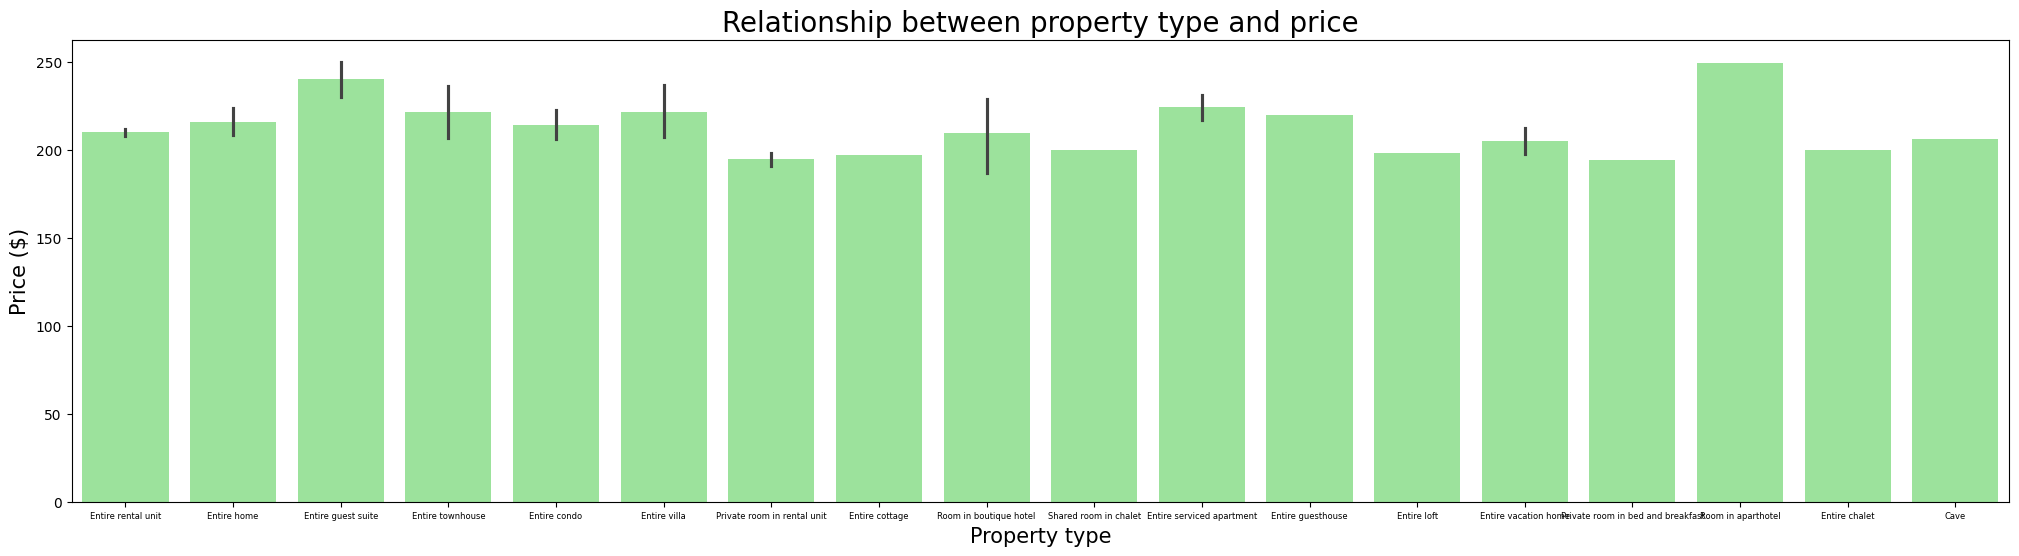

In [272]:
plt.figure(figsize = (25,6))
sns.barplot(data=listings_outliers, x='property_type', y='price', color='lightgreen')
plt.title('Relationship between property type and price', fontsize=20)
plt.xlabel('Property type', fontsize=15)
plt.ylabel('Price ($)', fontsize=15)
plt.xticks(fontsize=6)
